In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("fullnew.csv")

In [3]:
#data[data['Sex'] == 'male'].count()

In [4]:
#data[data['Sex'] == 'female'].count()

In [5]:
lb = LabelEncoder()
data['Embarked'] = lb.fit_transform(data['Embarked'].astype(str))
data['Sex'] = lb.fit_transform(data['Sex'].astype(str))
data['Pclass'] = lb.fit_transform(data['Pclass'].astype(str))
data = data.fillna(data.median())

In [6]:
#data['Sex'].fillna(data['Sex'].median(), inplace = True)

In [7]:
#print(data[data['Sex'] == 0].count())

In [8]:
#data[data['Sex'] == 1].count()

In [9]:
#full_data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']]
full_data = data[['Sex', 'Age']]
full_sur = data[['Survived']]

In [10]:
train, test, train_sur, test_sur = train_test_split(full_data, full_sur, train_size=0.70, test_size=0.30)
print(test_sur)

      Survived
477        0.0
775        0.0
10         1.0
0          0.0
50         0.0
455        1.0
161        1.0
697        1.0
207        1.0
895        1.0
291        1.0
1131       1.0
925        0.0
361        0.0
204        1.0
30         0.0
444        1.0
805        0.0
458        1.0
637        0.0
754        1.0
135        0.0
1134       0.0
565        0.0
211        1.0
952        0.0
17         1.0
572        1.0
680        0.0
1038       0.0
...        ...
1294       0.0
651        1.0
822        0.0
174        0.0
774        1.0
614        0.0
930        0.0
4          0.0
667        0.0
1278       0.0
536        0.0
101        0.0
79         1.0
83         0.0
880        1.0
416        1.0
1156       0.0
1164       1.0
629        0.0
888        0.0
114        0.0
306        1.0
920        0.0
1238       1.0
1180       0.0
8          1.0
881        0.0
1044       1.0
938        0.0
308        0.0

[393 rows x 1 columns]


In [11]:
model_svc = SVC()
#svc_params = [{'kernel': ['rbf'], 'gamma': [1, 10],
#                    'C': [1, 100, 1000]},
 #                   {'kernel': ['linear'], 'C': [1, 100, 1000]}]

svc_params = {'kernel': ['linear'], 'C': [1, 10], 'gamma': [0, 10]}
#svc_params = { 'C': [0.001], 'gamma': [100]}
svc_grid = GridSearchCV(model_svc, svc_params, cv=5)
#model_svc = SVC(kernel='linear', C=1, gamma=1).fit(train, train_sur)

In [12]:
svc_grid.fit(train, train_sur)
print(svc_grid.best_params_)
print(svc_grid.best_score_)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

{'C': 1, 'gamma': 0, 'kernel': 'linear'}
0.8580786026200873


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
print(svc_grid.best_estimator_.predict(test))

[0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.

In [14]:

svc_grid.score(test, test_sur)


0.8473282442748091

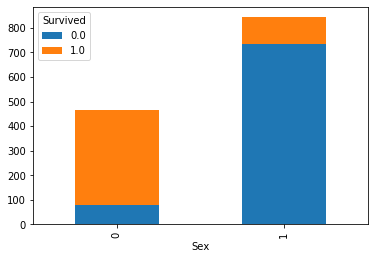

In [15]:
data.pivot_table('PassengerId', 'Sex','Survived', 'count').plot(kind='bar', stacked=True)

In [16]:
data[data['Sex'] == 1].count()

PassengerId    843
Survived       843
Pclass         843
Name           843
Sex            843
Age            843
SibSp          843
Parch          843
Ticket         843
Fare           843
Cabin          154
Embarked       843
WikiId         843
Name_wiki      841
Age_wiki       843
Hometown       841
Boarded        841
Destination    841
Lifeboat       165
Body           119
Class          843
dtype: int64

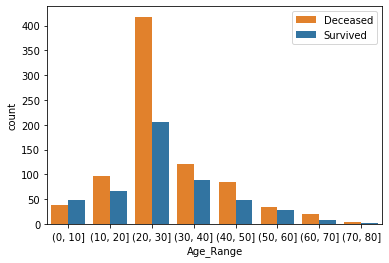

In [17]:
data['Age_Range'] = pd.cut(data.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = data, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

In [18]:
print("===== survived by gender and age")
data['Age_Range'] = pd.cut(data.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
print(data.groupby(["Sex", "Age_Range"])["Survived"].value_counts(normalize=True))

===== survived by gender and age
Sex  Age_Range  Survived
0    (0, 10]    1.0         0.707317
                0.0         0.292683
     (10, 20]   1.0         0.823529
                0.0         0.176471
     (20, 30]   1.0         0.818627
                0.0         0.181373
     (30, 40]   1.0         0.880000
                0.0         0.120000
     (40, 50]   1.0         0.782609
                0.0         0.217391
     (50, 60]   1.0         0.960000
                0.0         0.040000
     (60, 70]   1.0         1.000000
     (70, 80]   1.0         1.000000
1    (0, 10]    0.0         0.577778
                1.0         0.422222
     (10, 20]   0.0         0.893617
                1.0         0.106383
     (20, 30]   0.0         0.907143
                1.0         0.092857
     (30, 40]   0.0         0.829630
                1.0         0.170370
     (40, 50]   0.0         0.860465
                1.0         0.139535
     (50, 60]   0.0         0.891892
                1

In [19]:
Age = pd.cut(data['Age'], [0, 10, 20, 30, 40, 50, 60,70,80])

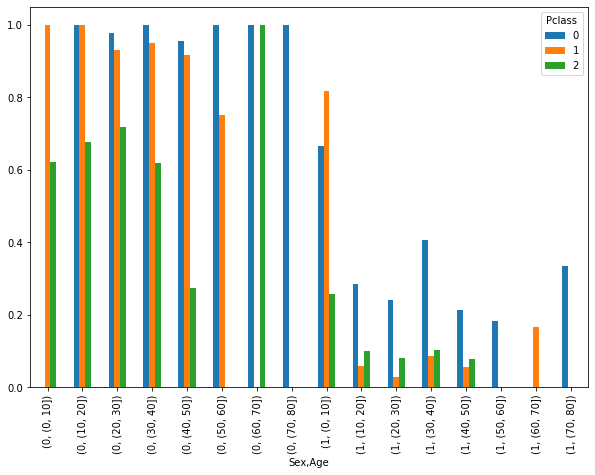

In [20]:
data.pivot_table('Survived', ['Sex', Age], 'Pclass').plot(kind='bar', figsize=(10,7))

In [21]:
Age = pd.cut(data['Age'], [0, 10, 20, 30, 40, 50, 60,70,80])

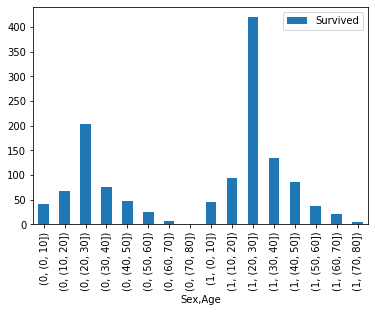

In [22]:
data.pivot_table( 'Survived',['Sex', Age], aggfunc = 'count').plot(kind='bar', stacked=True)